# Author:  David Fairbairn
Data 18 November 2022

###### ANA680 Final Project
 This is a Logistic Regression using a dataset related to the passangers 
from the maden voyage of the Ship RMS Titanic an Olympic-class ocean liner
The target variable for this analysis is 'Survived' indicating if the passanger survived.

This analysis will clean the data set, impute missing values and finally create, train 
and deploy a machine learning model for prediction of 'Survived'

### Variable Descriptions
##### Survived - Survival (0 = No; 1 = Yes)
##### Pclass - Passenger Class 91 = 1st; 2 = 2nd; 3 = 3rd)
##### Name - Passenger Name
##### Sex - Biological Sex (in 1912 sex was binary m/f)
##### Age - Passenger Age
##### SibSp - number of Siblings/Spouses Aboard
##### Parch - Number of Parents/Children Aboard
##### Ticket - Ticket Number
##### Fare - Passenger Fare (British Pound)
##### Cabin - Cabin location of Passenger 
##### Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)


### Import libraries  & set parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

import pickle

In [2]:
sb.set_style('whitegrid')
from collections import Counter


In [3]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [4]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

### Logistic Regression

#### set file path and load the subject data set file


In [6]:
# input_file ='C:\David\Python\Ex_Files_Python_Data_Science_EssT_Pt2\Exercise Files\Data'
# set the file location
input_file ='C:\David\ANA 680 Machine Learning Deployment\Data\Titanic'

#replace \ with / for file location in python
input_file = input_file.replace('\\','/')

#append the file name
input_file += "/titanic3.xls"

#read file to memory
titanic = pd.read_excel(input_file)

print(titanic.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [7]:
# Look at the info on the data set - missing values, attribute types...
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


### Check that target variable is binary

<AxesSubplot:xlabel='survived', ylabel='count'>

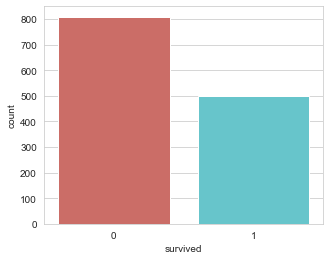

In [8]:
sb.countplot(x='survived', data=titanic, palette='hls')

### Check for missing values

### Look at various correlations

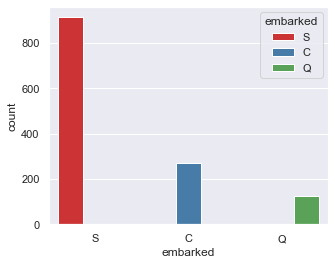

In [9]:
# port of embarkment
sb.set(style="darkgrid")
sb.countplot( x='embarked', data=titanic, hue="embarked", palette="Set1");

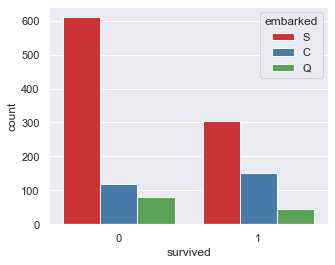

In [10]:
sb.set(style="darkgrid")
sb.countplot( x='survived', data=titanic, hue="embarked", palette="Set1");

In [11]:
#Gender
titanic.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


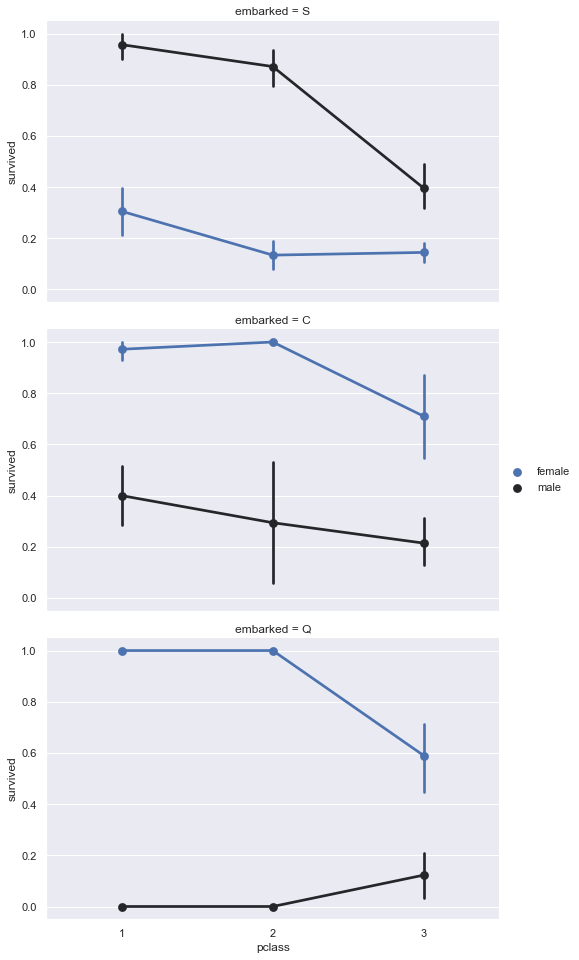

In [12]:
FacetGrid = sb.FacetGrid(titanic, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'pclass', 'survived', 'sex', order=None, hue_order=None )
FacetGrid.add_legend();

### Survival based on age and gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


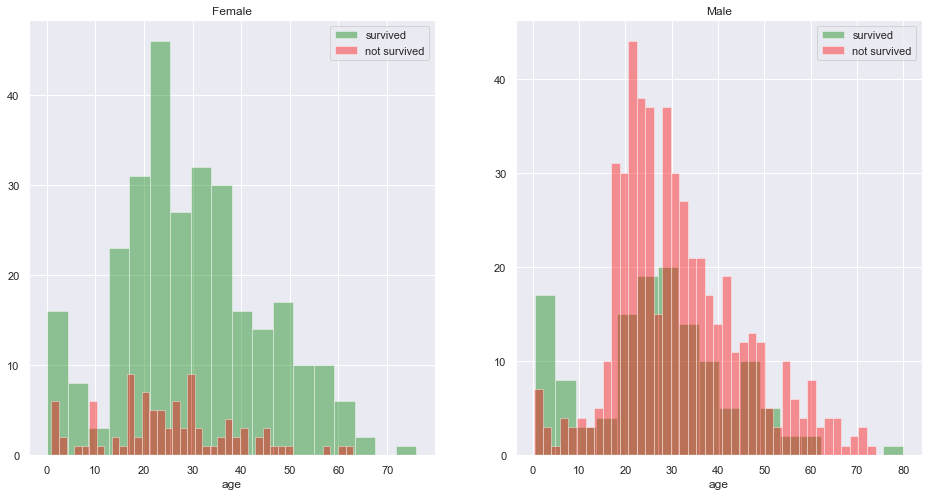

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']
ax = sb.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sb.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sb.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sb.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

### look at survival based on pclass

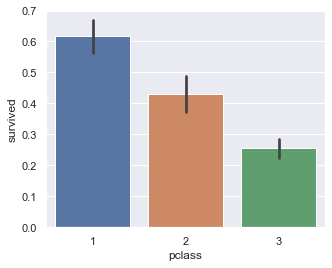

In [14]:
#pclass
sb.barplot(x='pclass', y='survived', data=titanic);

In [15]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
#can also use describe to provide summary statistics
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
# drop unnecessary variables
titanic_data = titanic.drop(['name','ticket','cabin', 'boat', 'body', 'home.dest'], axis=1)
titanic_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


### Impute missing values
#### The value of age is missing for 177 records.
#### We will impute an age based on the average age of a person in the Parch Group.

<AxesSubplot:xlabel='parch', ylabel='age'>

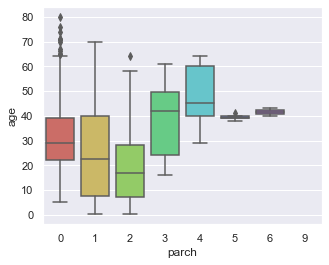

In [18]:
#distribution of age
sb.boxplot(x='parch', y='age', data=titanic_data, palette='hls')

In [19]:
Parch_groups = titanic_data.groupby(titanic_data['parch'])
Parch_groups.mean()

,pclass,survived,age,sibsp,fare
parch,,,,,
0,2.311377,0.335329,31.969401,0.243513,26.329820
1,2.158824,0.588235,24.965625,1.029412,50.078358
2,2.300885,0.504425,18.975945,1.902655,61.346275
3,2.125000,0.625000,38.875000,0.875000,86.688537
4,2.333333,0.166667,47.600000,0.666667,104.723617
5,3.000000,0.166667,39.333333,0.666667,32.356250
6,3.000000,0.000000,41.500000,1.000000,46.900000
9,3.000000,0.000000,NaN,1.000000,69.550000


In [20]:
#function to impute missing values, or values less than 1, for age based on the average age of a person in the same Parch group

def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age) or Age < 1:
        if Parch ==0:
            return 31
        elif Parch ==1:
            return 25
        elif Parch == 2:
            return 19
        elif Parch ==3:
            return 39
        elif Parch == 4:
            return 48
        elif Parch == 5:
            return 39
        else:
            return 42
    else:
        return Age

In [21]:
# execute the function to impute values
titanic_data['age']=titanic_data[['age','parch']].apply(age_approx, axis=1)

# check for nulls in data 
titanic_data.isnull().sum()


pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
dtype: int64

In [22]:
#drop the 2 records for embark and one for fare that have null values
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   sex       1306 non-null   object 
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   int64  
 5   parch     1306 non-null   int64  
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.8+ KB
None


### Convert categorical variables to dummy indicators

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
gender_cat = titanic_data['sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([0, 1, 0, 1, 0])

In [24]:
titanic_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0,0,0,211.3375,S
1,1,1,male,19.0,1,2,151.5500,S
2,1,0,female,2.0,1,2,151.5500,S
3,1,0,male,30.0,1,2,151.5500,S
4,1,0,female,25.0,1,2,151.5500,S


note that male = 1 & 0 = female based on the array  being 1,0,0,0,1 and the header male,female,female, female, male

In [25]:
#create gender dataframe
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,0
1,1
2,0
3,1
4,0


In [26]:
#encode embarked category
embarked_cat = titanic_data['embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0])

In [27]:
#use one hot encoder to create binalry dummy variables for embarked
from  sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C','Q','S'])

#look at the 1st 5 rows
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [28]:
#drop the original sex and embarked columns
titanic_data.drop(['sex','embarked'], axis =1, inplace = True)
titanic_data.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0,0,0,211.3375
1,1,1,19.0,1,2,151.5500
2,1,0,2.0,1,2,151.5500
3,1,0,30.0,1,2,151.5500
4,1,0,25.0,1,2,151.5500


In [29]:
#merge titanic_data, gender and embarked data
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]


,pclass,survived,age,sibsp,parch,fare,male_gender,C,Q,S
0,1.0,1.0,29.0,0.0,0.0,211.3375,0.0,0.0,0.0,1.0
1,1.0,1.0,19.0,1.0,2.0,151.5500,1.0,0.0,0.0,1.0
2,1.0,0.0,2.0,1.0,2.0,151.5500,0.0,0.0,0.0,1.0
3,1.0,0.0,30.0,1.0,2.0,151.5500,1.0,0.0,0.0,1.0
4,1.0,0.0,25.0,1.0,2.0,151.5500,0.0,0.0,0.0,1.0


### Check for independence between features 

<AxesSubplot:>

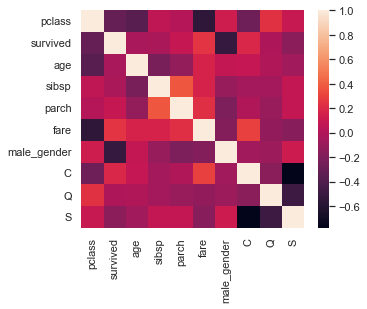

In [30]:
# using seaborn heatmap
sb.heatmap(titanic_dmy.corr())

In [31]:
# Pclass and Fare are not independent
titanic_dmy.drop(['fare','pclass'],axis=1, inplace =True)
titanic_dmy.head()

,survived,age,sibsp,parch,male_gender,C,Q,S
0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,19.0,1.0,2.0,1.0,0.0,0.0,1.0
2,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0
3,0.0,30.0,1.0,2.0,1.0,0.0,0.0,1.0
4,0.0,25.0,1.0,2.0,0.0,0.0,0.0,1.0


### Checking that dataset size is sufficient 

In [32]:
# rule of thumb is 50 records per predictor
# 6 predictive features therefor > 300 records
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1306 non-null   float64
 1   age          1306 non-null   float64
 2   sibsp        1306 non-null   float64
 3   parch        1306 non-null   float64
 4   male_gender  1306 non-null   float64
 5   C            1306 non-null   float64
 6   Q            1306 non-null   float64
 7   S            1306 non-null   float64
dtypes: float64(8)
memory usage: 81.8 KB


### Perform test and train split of data set

In [33]:
#split the data into training and test data sets 
#exclude the dependent variable
x_train, x_test, y_train, y_test= train_test_split(titanic_dmy.drop('survived', axis=1), 
                                                   titanic_dmy['survived'], test_size =0.2,
                                                  random_state = 200)

In [34]:
#look at shape of output
print(x_train.shape)
print(y_train.shape)

(1044, 7)
(1044,)


In [35]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))
print(x_train.head())
y_train.describe() # Generates descriptive statistics.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
       age  sibsp  parch  male_gender    C    Q    S
1239  31.0    0.0    0.0          1.0  1.0  0.0  0.0
870   31.0    0.0    0.0          0.0  0.0  0.0  1.0
32    30.0    0.0    0.0          0.0  0.0  0.0  1.0
676    6.0    1.0    1.0          1.0  1.0  0.0  0.0
562   40.0    0.0    0.0          0.0  0.0  0.0  1.0


count    1044.000000
mean        0.384100
std         0.486615
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

In [36]:
x_train[0:5]

,age,sibsp,parch,male_gender,C,Q,S
1239,31.0,0.0,0.0,1.0,1.0,0.0,0.0
870,31.0,0.0,0.0,0.0,0.0,0.0,1.0
32,30.0,0.0,0.0,0.0,0.0,0.0,1.0
676,6.0,1.0,1.0,1.0,1.0,0.0,0.0
562,40.0,0.0,0.0,0.0,0.0,0.0,1.0


### Deploying and evaluating the model

In [37]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_pred = model.predict(x_test)

### Model Evaluation
#### Classification report without cross-validation


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       165
         1.0       0.76      0.71      0.73        97

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



##### Precision and recall avg 81%

#### K-Fold cross-validation and confusion matrices

In [41]:
y_train_pred = cross_val_predict(model, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[548,  95],
       [138, 263]], dtype=int64)

#### 548 and 263 are the number of correct predictions
##### 95 and 138 are the number of incorrect predictions

In [42]:
#precision score
precision_score(y_train, y_train_pred)

0.7346368715083799

In [43]:
#accuracy score
accuracy_score(y_train, y_train_pred)

0.7768199233716475

### Save the model

In [44]:
# Open a file and use dump()
with open('Titanic_Model.pkl','wb') as file:
    #create a new file 
    pickle.dump(model,file)

In [47]:
survived = model.predict(np.array([[35, 1, 0, 0, 1, 0, 0]]))
print(survived)

[1.]


#### Make a test prediction

In [46]:
# sample passanger
titanic_dmy[863:864]


,survived,age,sibsp,parch,male_gender,C,Q,S
863,0.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0


In [203]:
# Crate a Test Passanger
test_passenger = np.array([1,40,0,0,0,0,0,1]).reshape(1,-1)

# get value of 'Survived' for the test passanger
print(model.predict(test_passenger))

# get the precentage that our prediction is correct
print(model.predict_proba(test_passenger))

[1.]
[[0.15201451 0.84798549]]


##### The first output [1.] indicates that our test passenger is perdicted to survive
##### There is a 70.55% probibality that this result is correct

In [204]:
# Script to allow user interaction with model

keep_running = 'y'

while True:

    if keep_running =='n':
        break
    else:
       # input_array = np.array(8)
       # input_array =[0]*8
        input_array = np.empty((7))
       # input_array[0] = 866
        #inputs are strings and so convert to int
        input_array[0] = int(input("Enter Age:"))
        input_array[1] = int(input("enter 1 if traveling with spouse; 0 if not:"))
        input_array[2] = int(input("enter number of family members excluding self & spouse:"))
        input_array[3] = int(input("Sex enter (0 for female; 1 for male):"))
        
        

        port_input = (input("port of entry, enter( C for Cherbourg; Q for Queenstown; S for Southhampton):")).upper()
        #port_input = port_input.upper() #convert string to uppercase for comparison
        
        #print (port_input)
        if port_input == "C":
            input_array[4] = 1
            input_array[5] = 0
            input_array[6] = 0
        elif port_input == "Q":
            input_array[4] = 0
            input_array[5] = 1
            input_array[6] = 0
        else:
            input_array[4] = 0
            input_array[5] = 0
            input_array[6] = 1
            
        print(input_array)
        
        test_passenger = (input_array).reshape(1, -1) 
        #print(test_passenger)
        # get value of 'Survived' for the test passanger
        print(LogReg.predict(test_passenger))
        Survived = (LogReg.predict(test_passenger))
        
        #display variable population
        #sex
        if input_array[3] == 0:
            iSex = "Female"
        else:
            iSex = "Male"
        #spouse
        if input_array[1] == 0:
            iSpouse = "without"
        else:
            iSpouse = "with"
        
        if input_array[2] == 0:
            iRelative = "no"
        else:
            iRelative = input_array[3].astype(str)
        
        #port
        if input_array[4] == "C":
            iPort = "Cherbourg, France"
        elif input_array[4] =="Q":
            iPort = "Queenstown, England"
        else:
            iPort = "ShoutHampton, Ireland "
        
        if Survived == 1:
            iSurvived = "survived"
        else:
            iSurvived = "not survived"

        #convert numpy float array to string
        iAge = input_array[0].astype(str)
        
        oString = "A " + iSex + ", " + iAge +" years of age, traveling " + iSpouse 
        oString +=  " Spouse and "+ iRelative +" relatives, " + "embarkinig from " + iPort 
        oString += "is predicted to have " + iSurvived 
        
        #print results
        print(oString)
        
        keep_running = input("Enter another passanger?(y/n):")

Enter Passenger Class:1
Enter Age:45
enter 1 if traveling with spouse; 0 if not:1
enter number of family members excluding self & spouse:2
Sex enter (0 for female; 1 for male):1
port of entry, enter( C for Cherbourg; Q for Queenstown; S for Southhampton):Q


IndexError: index 7 is out of bounds for axis 0 with size 7